In [1]:
import os
os.sys.path.append('../')
os.sys.path.append('../../../evaluation/')
import numpy as np
import matplotlib.pyplot as plt
from create_training_data_lib import random_mixture_sample, plot_cov_ellipse, plot_1d_mixture, plot_2d_mixture, correlation_to_covariance


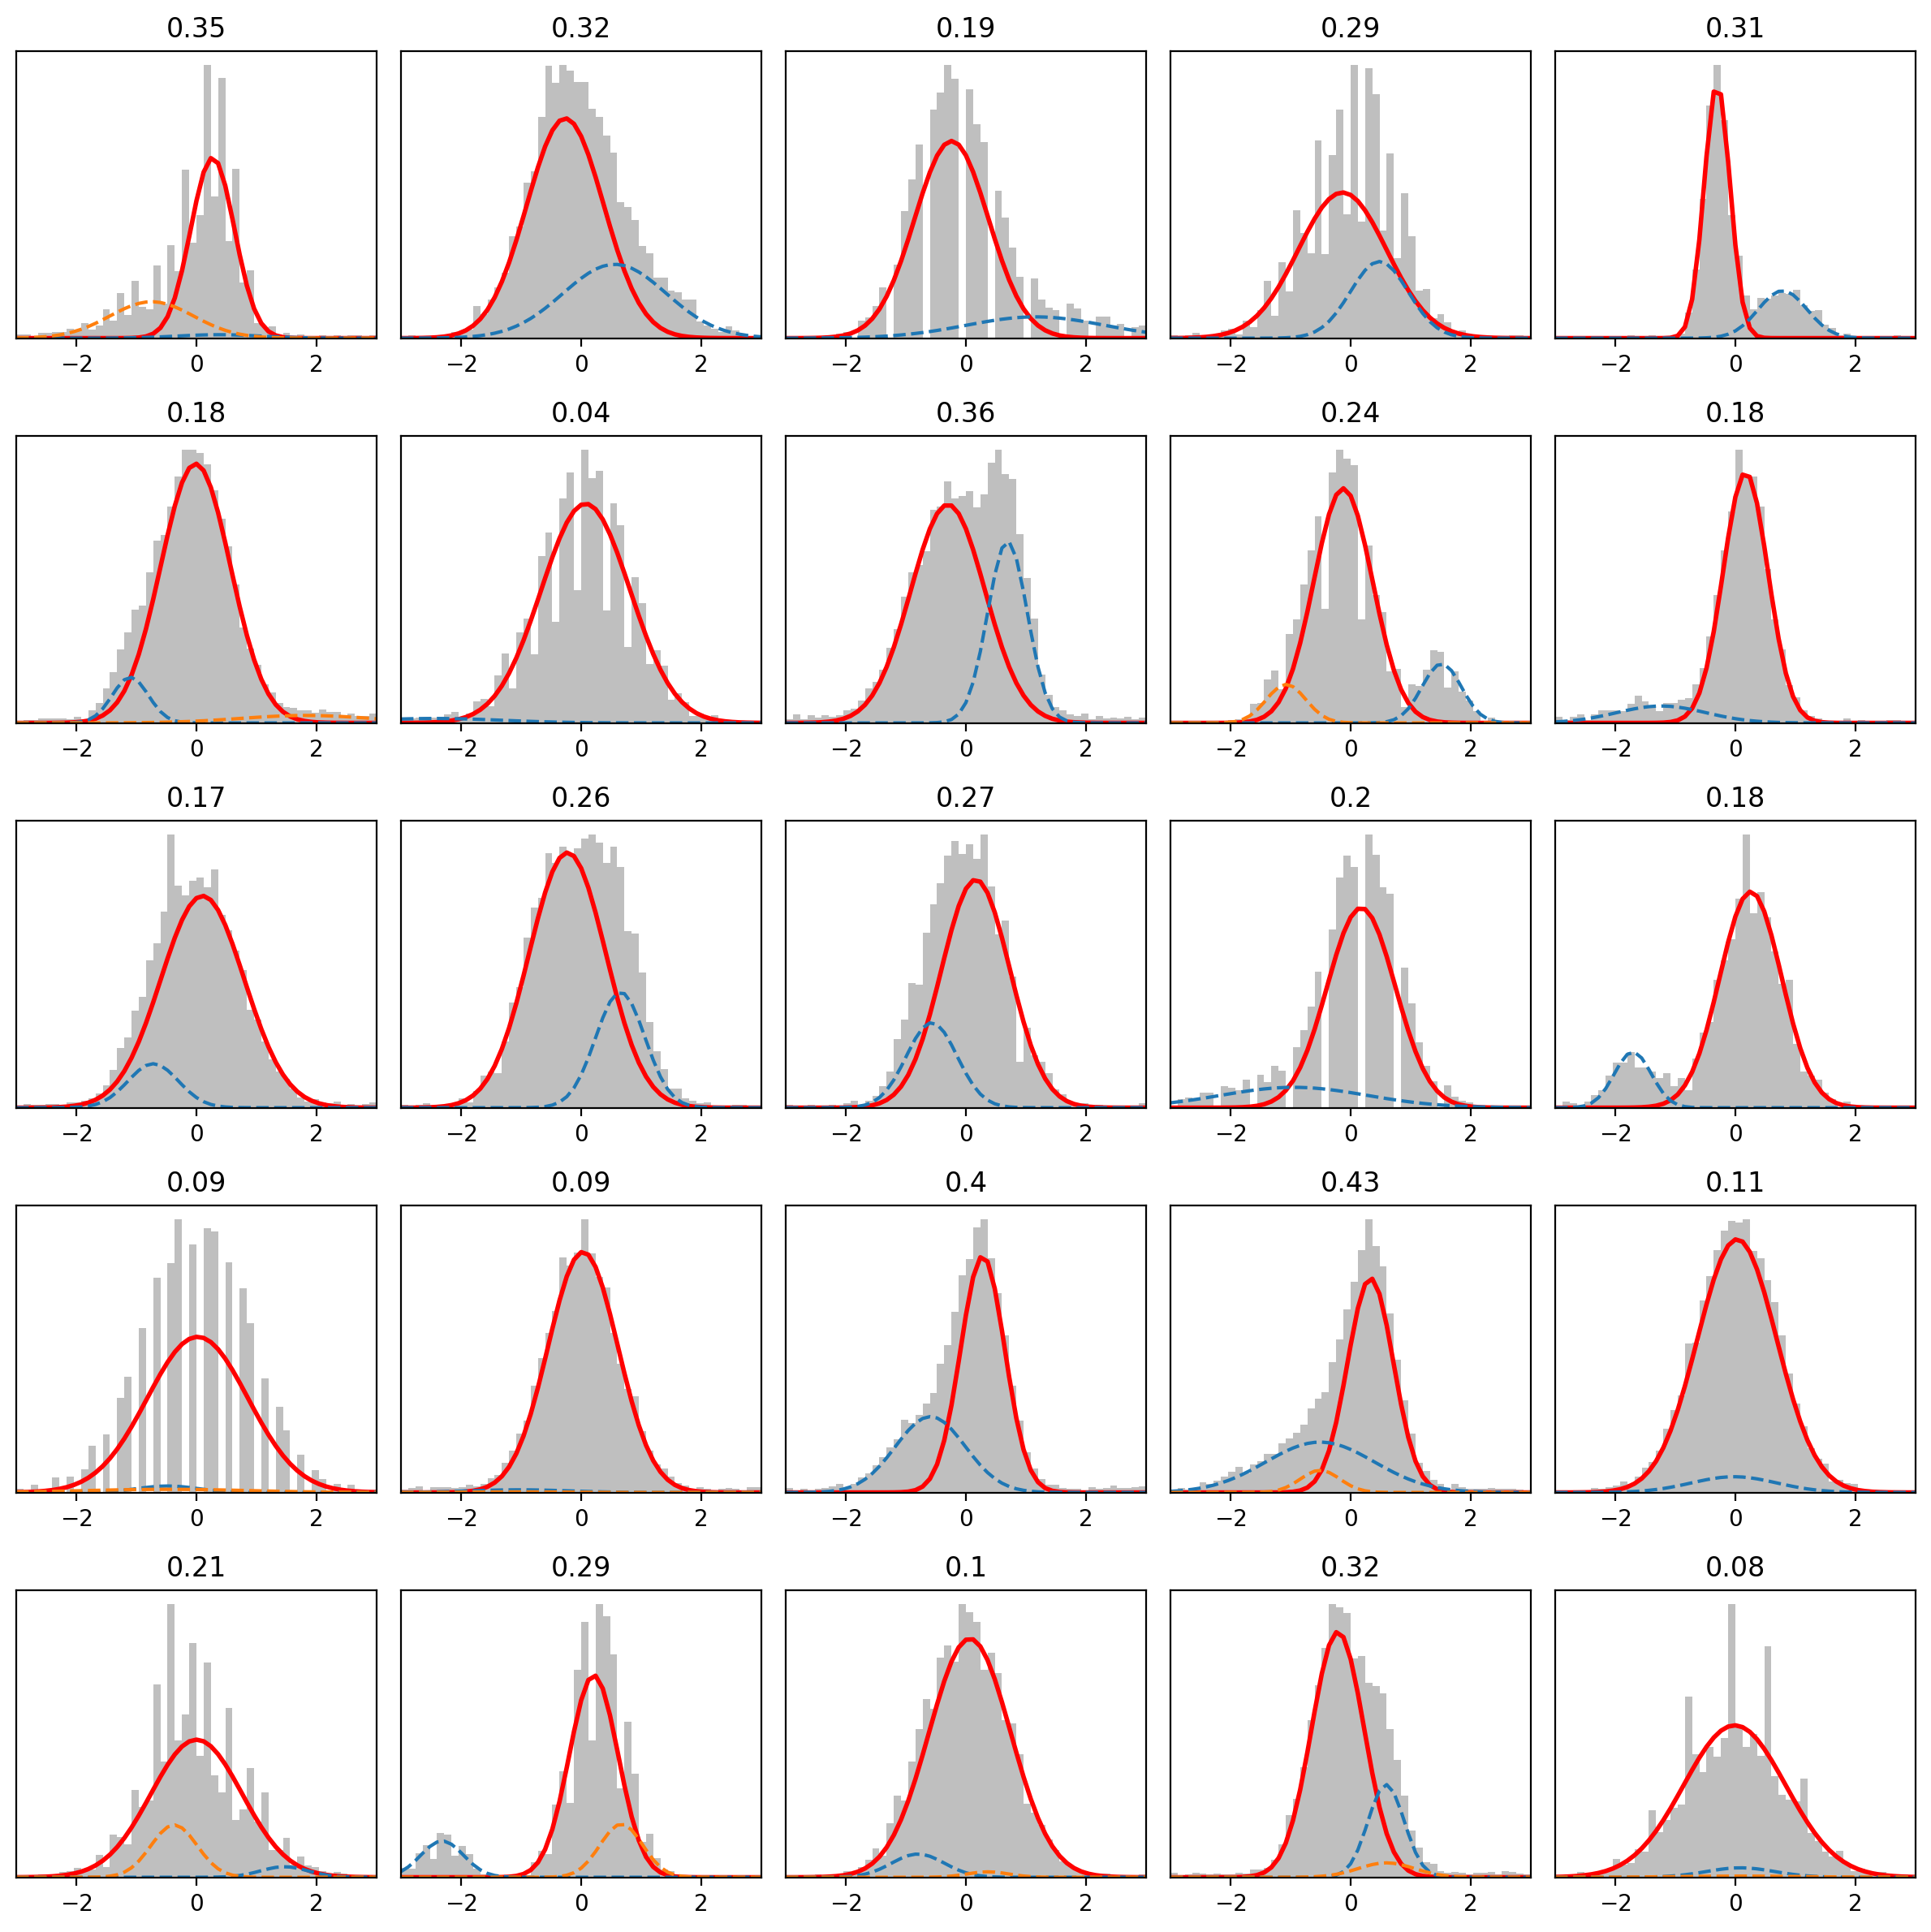

In [4]:
# plot 1D examples
    
n_dimensions = 1 # number of dimensions
n_components = [1, 2] # possible number of pathological components
sample_sizes = [250, 10000]  # possible no. samples
mean_range = [-3, 3] # min/max possible mean of distributions
pathological_dev_percentage_range=[30, 60]
    
nc = 5
nr = 5
plt.figure(figsize=(12, 12), dpi=200)
for i in range(nc*nr):
    
    sample, mean_vectors, std_devs, comps, sizes = random_mixture_sample(
        n_dimensions = n_dimensions, 
        n_components = np.random.choice(n_components),
        n_samples = np.random.uniform(sample_sizes[0], sample_sizes[1]),
        quantize_step = np.random.choice([0, 0.05, 0.1, 0.2]),
        mean_range = mean_range,
        pathological_dev_percentage_range = pathological_dev_percentage_range
    )
            
    plt.subplot(nr, nc, i+1)

    plot_1d_mixture(
        sample, 
        sizes, 
        mean_vectors, 
        std_devs,
        scope=[-3, 3]
    )
    plt.title(round(sum(sizes[1:])/sum(sizes), 2))
plt.tight_layout()


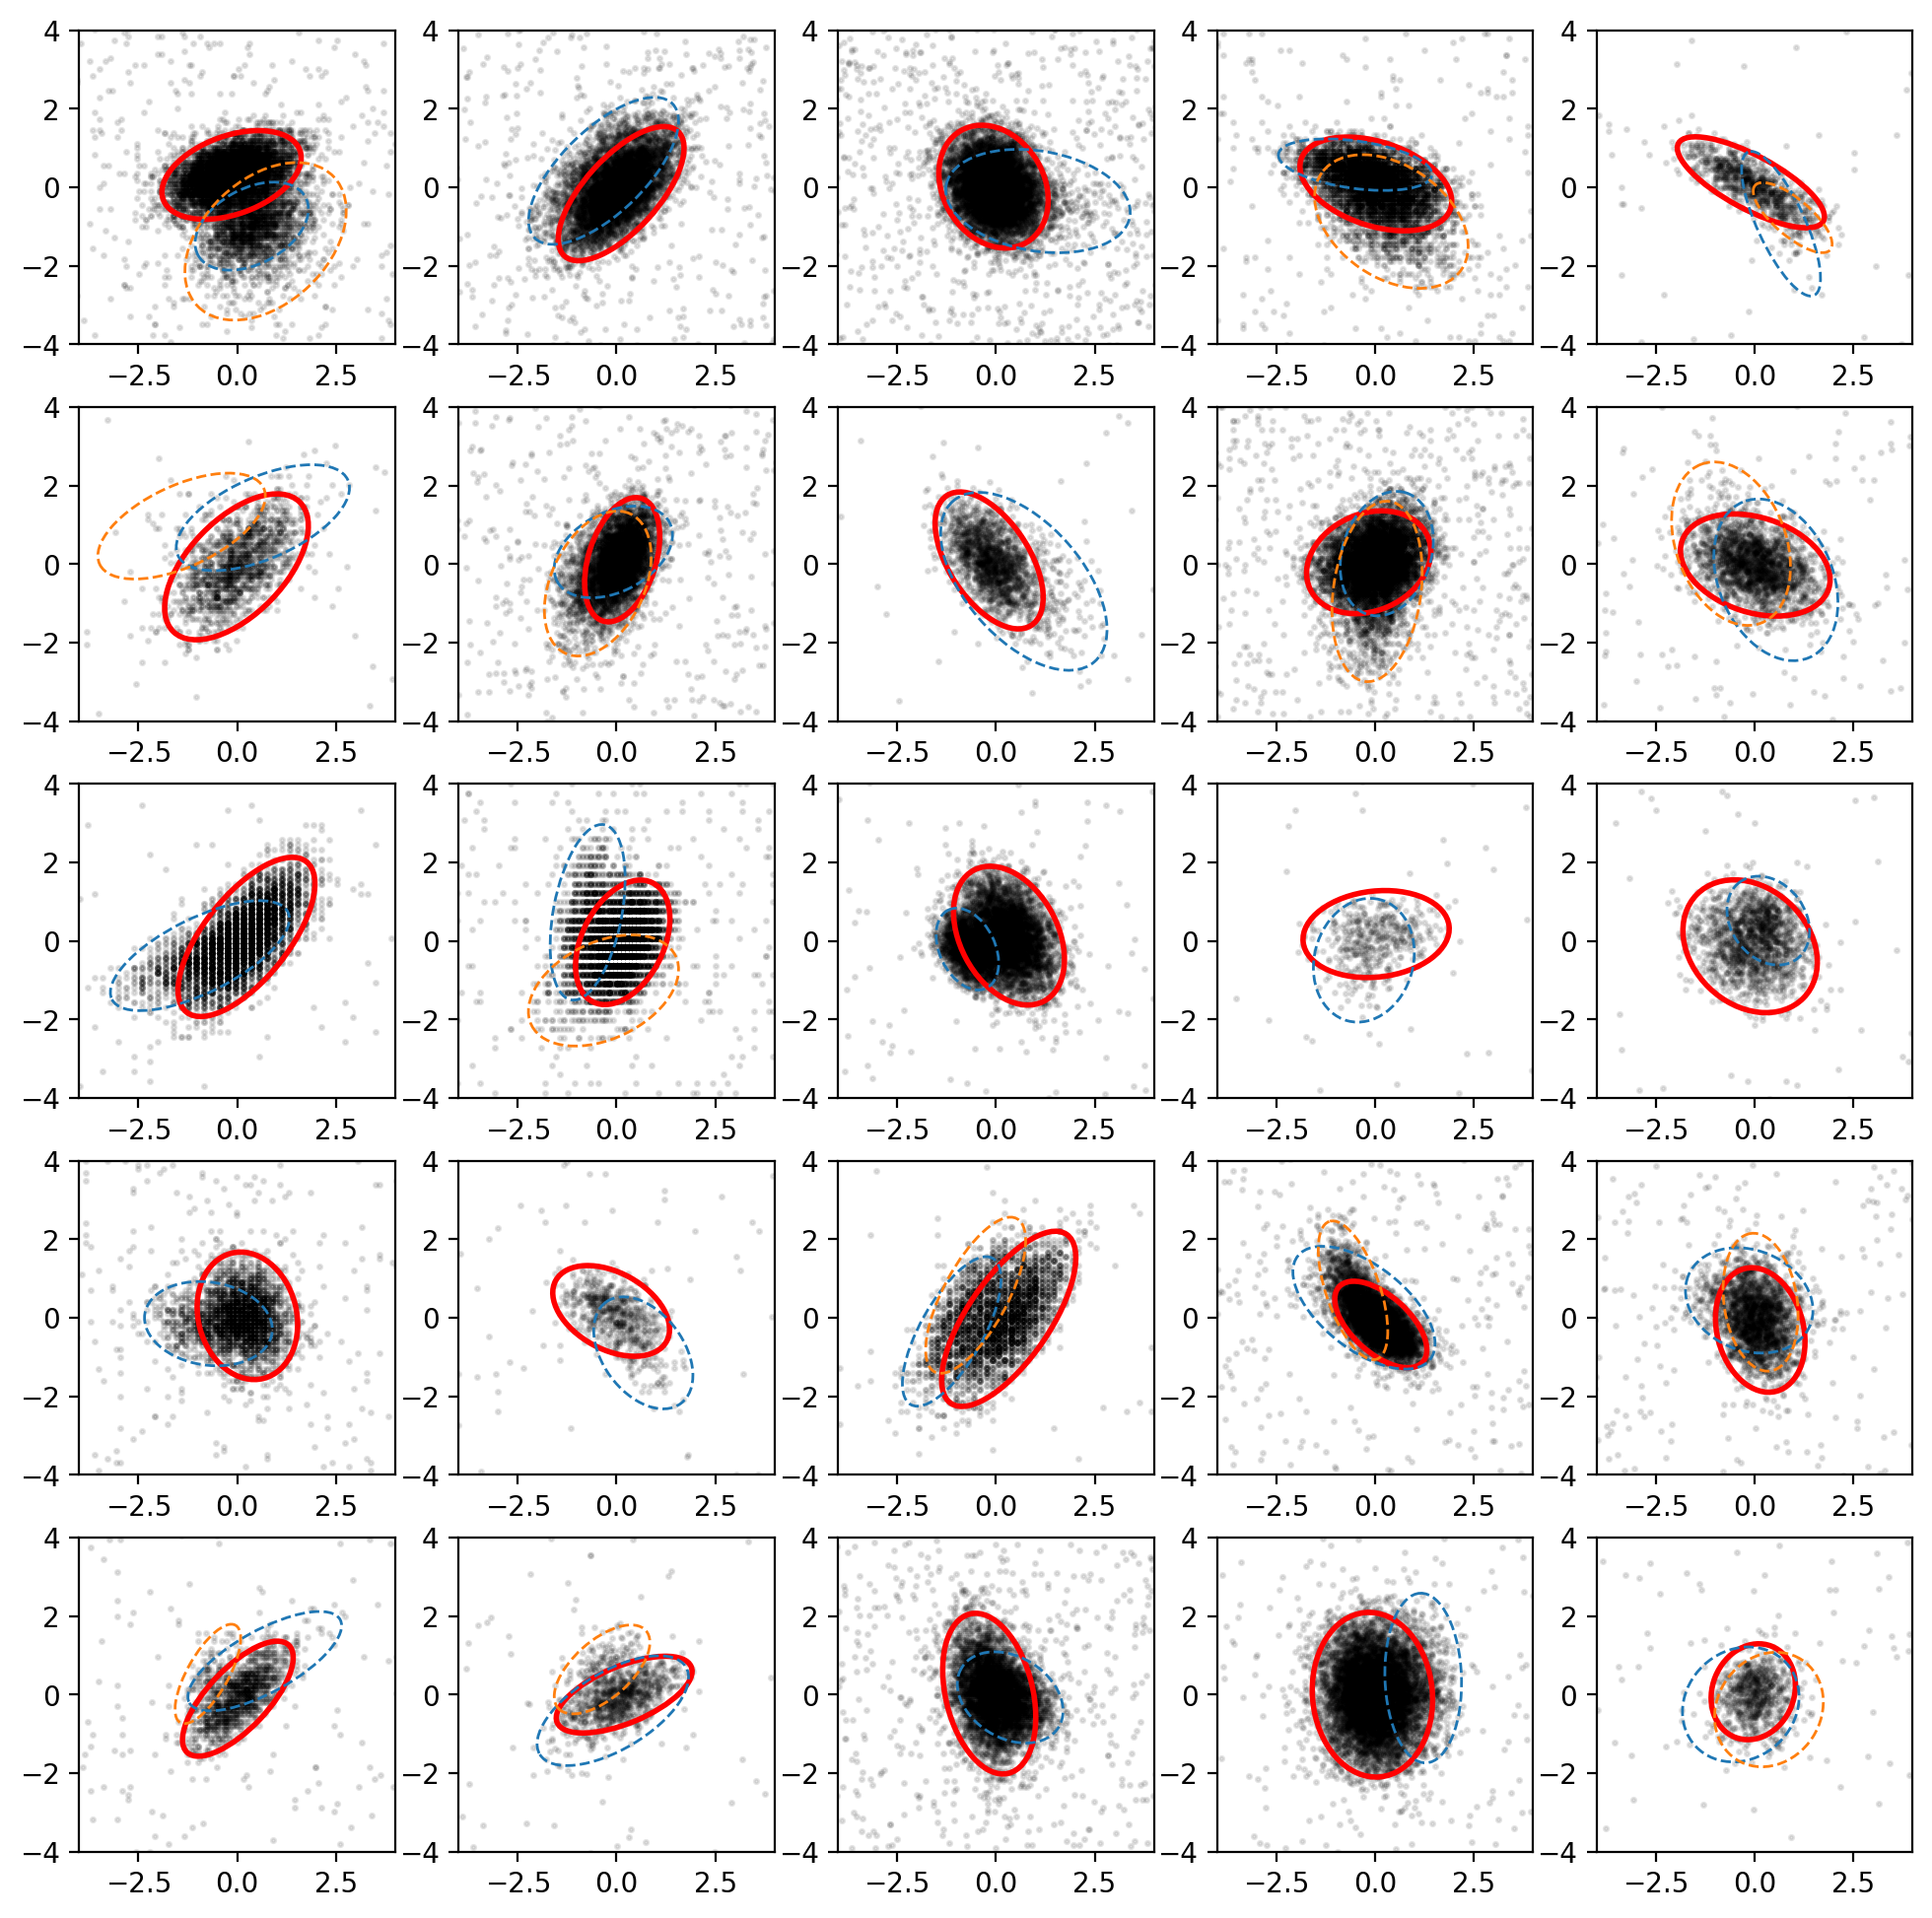

In [3]:
# plot 2D examples

n_dimensions = 2 # number of dimensions
n_components = [1, 2] # possible number of pathological components
sample_sizes = [250, 10000]  # possible no. samples
    
nc = 5
nr = 5
plt.figure(figsize=(12, 12), dpi=200)
for i in range(nc*nr):
    
    # sample from random Gaussian mixture
    sample, mean_vectors, std_devs, corr_mats, comps, sizes = random_mixture_sample(
        n_dimensions = n_dimensions, 
        n_components = np.random.choice(n_components),
        n_samples = np.random.uniform(sample_sizes[0], sample_sizes[1]),
        quantize_step = np.random.choice([0, 0.05, 0.1, 0.2]),
    )
    
    cov_mats = [correlation_to_covariance(i,j) for i,j in zip(corr_mats, std_devs)]
    
    plt.subplot(nr, nc, i+1)
    
    plot_2d_mixture(
        sample, 
        mean_vectors, 
        cov_mats,
        standardize=True
    )
